<a href="https://colab.research.google.com/github/monishreddy1321/Audio_Classification/blob/main/audio_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Total audio files found: 350


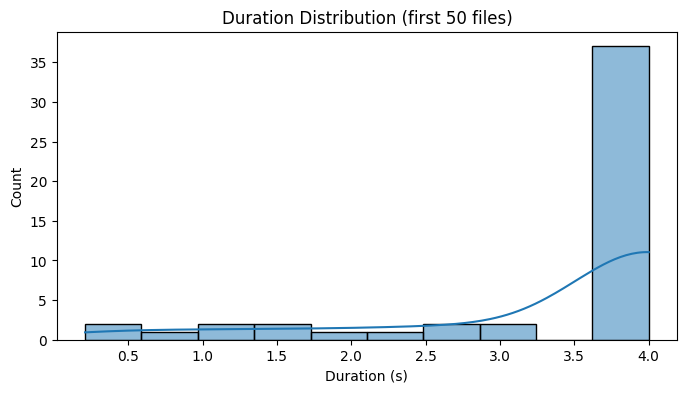

In [ ]:
#EDA
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Path to your .wav files
audio_folder = "UrbanSound8K"
audio_files = [f for f in os.listdir(audio_folder) if f.endswith(".wav")]

print("Total audio files found:", len(audio_files))

# Analyze durations
durations = []
for file in audio_files[:50]:  # Just analyzing first 50 for speed
    y, sr = librosa.load(os.path.join(audio_folder, file), sr=22050)
    durations.append(librosa.get_duration(y=y, sr=sr))

# Plot duration distribution
plt.figure(figsize=(8, 4))
sns.histplot(durations, bins=10, kde=True)
plt.title("Duration Distribution (first 50 files)")
plt.xlabel("Duration (s)")
plt.ylabel("Count")
plt.show()

In [ ]:
#Preprocessing
def extract_features(file_path):
    y, sr = librosa.load(file_path, sr=22050)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)
    chroma = librosa.feature.chroma_stft(y=y, sr=sr)
    mel = librosa.feature.melspectrogram(y=y, sr=sr)
    contrast = librosa.feature.spectral_contrast(y=y, sr=sr)
    zcr = librosa.feature.zero_crossing_rate(y=y)
    rms = librosa.feature.rms(y=y)

    return np.hstack([
        np.mean(mfcc, axis=1),
        np.mean(chroma, axis=1),
        np.mean(mel, axis=1),
        np.mean(contrast, axis=1),
        np.mean(zcr, axis=1),
        np.mean(rms, axis=1)
    ])

import numpy as np
from tqdm import tqdm

X, filenames = [], []

for file in tqdm(audio_files):
    try:
        path = os.path.join(audio_folder, file)
        features = extract_features(path)
        X.append(features)
        filenames.append(file)
    except Exception as e:
        print(f"Error in {file}: {e}")

X = np.array(X)
print("Extracted feature shape:", X.shape)

# Save to disk if needed
np.save("X_features.npy", X)
np.save("filenames.npy", filenames)


  9%|▉         | 32/350 [00:05<00:42,  7.52it/s]/usr/local/lib/python3.11/dist-packages/librosa/core/pitch.py:103: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(
100%|██████████| 350/350 [00:29<00:00, 11.70it/s]

Extracted feature shape: (350, 189)


In [ ]:
import os

# Print the first 10 filenames
for file in os.listdir('UrbanSound8K')[:10]:
    print(file)


17913-4-1-0.wav
159738-8-0-4.wav
147764-4-0-0.wav
134717-0-0-19.wav
147764-4-4-0.wav
177621-0-0-0.wav
176787-5-0-26.wav
124489-9-0-16.wav
157867-8-0-10.wav
151977-0-0-12.wav


In [ ]:
#Extract class labels from filenames
import os

# Folder path
folder_path = 'UrbanSound8K'

# Get all wav files
files = [f for f in os.listdir(folder_path) if f.endswith('.wav')]

# Extract labels
labels = [int(f.split('-')[1]) for f in files]

# Optional: Print first 10
for f, label in zip(files[:10], labels[:10]):
    print(f"Filename: {f}, Label: {label}")


Filename: 17913-4-1-0.wav, Label: 4
Filename: 159738-8-0-4.wav, Label: 8
Filename: 147764-4-0-0.wav, Label: 4
Filename: 134717-0-0-19.wav, Label: 0
Filename: 147764-4-4-0.wav, Label: 4
Filename: 177621-0-0-0.wav, Label: 0
Filename: 176787-5-0-26.wav, Label: 5
Filename: 124489-9-0-16.wav, Label: 9
Filename: 157867-8-0-10.wav, Label: 8
Filename: 151977-0-0-12.wav, Label: 0


In [ ]:
import numpy as np

# Save as numpy arrays
np.save("features.npy", features)
np.save("labels.npy", np.array(labels))


In [ ]:
import os
import librosa
import numpy as np
from tqdm import tqdm

folder_path = "UrbanSound8K"
features = []
labels = []

for file in tqdm(sorted(os.listdir(folder_path))):
    if file.endswith(".wav"):
        file_path = os.path.join(folder_path, file)
        try:
            # Load audio
            y, sr = librosa.load(file_path, sr=None)
            # Extract MFCC
            mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)
            mfcc_scaled = np.mean(mfcc.T, axis=0)
            features.append(mfcc_scaled)

            # Extract label
            label = int(file.split("-")[1])  # Second item is the class ID
            labels.append(label)
        except Exception as e:
            print(f"Error with file {file}: {e}")


100%|██████████| 350/350 [00:10<00:00, 34.17it/s]


In [ ]:
features = np.array(features)
labels = np.array(labels)
print(features.shape)  # should be (350, 40)
print(labels.shape)    # should be (350,)


(350, 40)
(350,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)


In [ ]:
#Basic ANN Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

# One-hot encode labels
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

model = Sequential([
    Dense(256, activation='relu', input_shape=(features.shape[1],)),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')  # Assuming 10 classes
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train
model.fit(X_train, y_train_encoded, epochs=30, batch_size=32, validation_split=0.2)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - accuracy: 0.0857 - loss: 43.5984 - val_accuracy: 0.2500 - val_loss: 11.9064
Epoch 2/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.1914 - loss: 24.5158 - val_accuracy: 0.4286 - val_loss: 9.8032
Epoch 3/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.2167 - loss: 16.4673 - val_accuracy: 0.4107 - val_loss: 5.9948
Epoch 4/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.2994 - loss: 14.6799 - val_accuracy: 0.5000 - val_loss: 4.2789
Epoch 5/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3302 - loss: 10.3395 - val_accuracy: 0.5179 - val_loss: 3.7435
Epoch 6/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.3745 - loss: 7.9426 - val_accuracy: 0.4464 - val_loss: 2.7000
Epoch 7/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.3033 - loss: 6.4792 - val_accuracy: 0.5179 - val_loss: 1.8410
Epoch 8/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3734 - loss: 4.8335 - val_accuracy: 0.5179 - val_loss: 1

In [ ]:
!pip install librosa audiomentations tensorflow matplotlib scikit-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.2 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of numpy-minmax to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of numpy-rms to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 260.1/260.1 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 60.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.4/113.4 kB 8.4 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: librosa
    Found existing installation: librosa 0.11.0
    Uninstalling librosa-0.11.0:
      Successfully uninstalled librosa-0.11.0


In [ ]:
#Step 1: Load Audio Data from UrbanSound8K (Flat Folder)
import os
import librosa
import numpy as np

AUDIO_DIR = 'UrbanSound8K'
SAMPLE_RATE = 22050

def extract_features(file_path):
    audio, sr = librosa.load(file_path, sr=SAMPLE_RATE)

    mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=40)
    chroma = librosa.feature.chroma_stft(y=audio, sr=sr)
    zcr = librosa.feature.zero_crossing_rate(y=audio)
    contrast = librosa.feature.spectral_contrast(y=audio, sr=sr)
    rmse = librosa.feature.rms(y=audio)

    combined = np.hstack([
        np.mean(mfcc.T, axis=0),
        np.mean(chroma.T, axis=0),
        np.mean(zcr.T, axis=0),
        np.mean(contrast.T, axis=0),
        np.mean(rmse.T, axis=0)
    ])

    return combined

features = []
labels = []

for file in os.listdir(AUDIO_DIR):
    if file.endswith(".wav"):
        label = file.split("-")[1]  # Assuming filenames like 000001-3.wav
        try:
            feat = extract_features(os.path.join(AUDIO_DIR, file))
            features.append(feat)
            labels.append(int(label))
        except:
            continue

features = np.array(features)
labels = np.array(labels)


/usr/local/lib/python3.11/dist-packages/librosa/core/pitch.py:103: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(


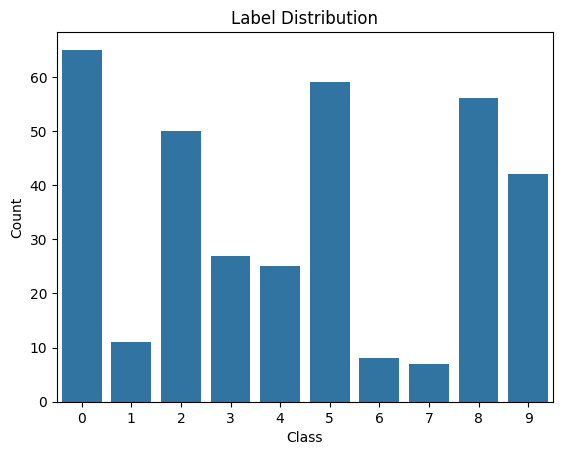

In [ ]:
#Step 2: Visualize Data Distribution
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x=labels)
plt.title("Label Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()


In [ ]:
#Step 3: Data Augmentation
from audiomentations import Compose, AddGaussianNoise, PitchShift, TimeStretch

augment = Compose([
    AddGaussianNoise(min_amplitude=0.001, max_amplitude=0.015, p=0.5),
    PitchShift(min_semitones=-4, max_semitones=4, p=0.5),
    TimeStretch(min_rate=0.8, max_rate=1.25, p=0.5)
])

# Example: apply augmentation to one sample
# y_aug = augment(samples=audio, sample_rate=SAMPLE_RATE)


ModuleNotFoundError: No module named 'audiomentations'

In [ ]:
#Step 4: Train-Test Split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

X_train, X_test, y_train, y_test = train_test_split(features_scaled, labels, test_size=0.2, random_state=42)


In [ ]:
#Step 5: ANN Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

early = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model.fit(X_train, y_train, validation_split=0.2, epochs=50, callbacks=[early])


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - accuracy: 0.1422 - loss: 3.0704 - val_accuracy: 0.3929 - val_loss: 1.9704
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.3856 - loss: 1.7524 - val_accuracy: 0.6607 - val_loss: 1.6921
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5488 - loss: 1.3723 - val_accuracy: 0.7143 - val_loss: 1.4769
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6991 - loss: 0.9852 - val_accuracy: 0.7857 - val_loss: 1.3067
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7254 - loss: 0.8542 - val_accuracy: 0.8036 - val_loss: 1.1628
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7671 - loss: 0.7171 - val_accuracy: 0.8393 - val_loss: 1.0414
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8298 - loss: 0.6124 - val_accuracy: 0.8929 - val_loss: 0.9203
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8364 - loss: 0.5722 - val_accuracy: 0.9464 - val_loss: 0.8095
Epoch 9/50


In [ ]:
#Step 6: CNN Model using MFCC (reshaped to 2D)
def extract_mfcc_2d(file_path, max_len=44):
    audio, sr = librosa.load(file_path, sr=SAMPLE_RATE)
    mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=40)
    if mfcc.shape[1] < max_len:
        pad_width = max_len - mfcc.shape[1]
        mfcc = np.pad(mfcc, pad_width=((0,0), (0,pad_width)), mode='constant')
    else:
        mfcc = mfcc[:, :max_len]
    return mfcc

# Apply to dataset
X_mfcc = [extract_mfcc_2d(os.path.join(AUDIO_DIR, f)) for f in os.listdir(AUDIO_DIR) if f.endswith(".wav")]
X_mfcc = np.array(X_mfcc)[..., np.newaxis]
y_mfcc = labels[:len(X_mfcc)]

X_train_cnn, X_test_cnn, y_train_cnn, y_test_cnn = train_test_split(X_mfcc, y_mfcc, test_size=0.2, random_state=42)


In [ ]:
#CNN Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten

cnn = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=X_train_cnn.shape[1:]),
    MaxPooling2D((2, 2)),
    Dropout(0.3),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.3),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn.fit(X_train_cnn, y_train_cnn, validation_split=0.2, epochs=50, callbacks=[early])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 130ms/step - accuracy: 0.1935 - loss: 13.1037 - val_accuracy: 0.4464 - val_loss: 1.9259
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - accuracy: 0.2914 - loss: 2.5634 - val_accuracy: 0.4464 - val_loss: 1.9662
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 157ms/step - accuracy: 0.2783 - loss: 2.0539 - val_accuracy: 0.3393 - val_loss: 1.9438
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - accuracy: 0.3740 - loss: 1.8444 - val_accuracy: 0.4643 - val_loss: 1.7132
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - accuracy: 0.4277 - loss: 1.5549 - val_accuracy: 0.5179 - val_loss: 1.4206
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 123ms/step - accuracy: 0.4492 - loss: 1.4995 - val_accuracy: 0.5714 - val_loss: 1.1995
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 146ms/step - accuracy: 0.5956 - loss: 1.2320 - val_accuracy: 0.6250 - val_loss: 1.0843
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 148ms/step - accuracy: 0.5993 - loss: 1.2041 - val_accuracy: 0.6607 - val_loss: 0

In [ ]:
#Step 7: Pretrained Model — YAMNet (TensorFlow Hub)
!pip install tensorflow_hub

import tensorflow_hub as hub
import tensorflow as tf

yamnet_model_handle = 'https://tfhub.dev/google/yamnet/1'
yamnet = hub.load(yamnet_model_handle)

def extract_yamnet_embeddings(file_path):
    waveform, sr = librosa.load(file_path, sr=16000)
    waveform = waveform[:16000]  # clip or pad to 1 sec
    waveform = tf.convert_to_tensor(waveform, dtype=tf.float32)
    scores, embeddings, spectrogram = yamnet(waveform)
    return embeddings.numpy().mean(axis=0)  # average over time

X_yamnet = []
y_yamnet = []

for f in os.listdir(AUDIO_DIR):
    if f.endswith('.wav'):
        label = int(f.split('-')[1])
        try:
            emb = extract_yamnet_embeddings(os.path.join(AUDIO_DIR, f))
            X_yamnet.append(emb)
            y_yamnet.append(label)
        except:
            continue

X_yamnet = np.array(X_yamnet)
y_yamnet = np.array(y_yamnet)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 139ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           2       0.88      1.00      0.93         7
           3       1.00      0.67      0.80         3
           4       1.00      0.67      0.80         3
           5       1.00      1.00      1.00        18
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         2
           8       0.94      1.00      0.97        17
           9       1.00      1.00      1.00         5

    accuracy                           0.97        70
   macro avg       0.98      0.93      0.94        70
weighted avg       0.97      0.97      0.97        70



<Axes: >

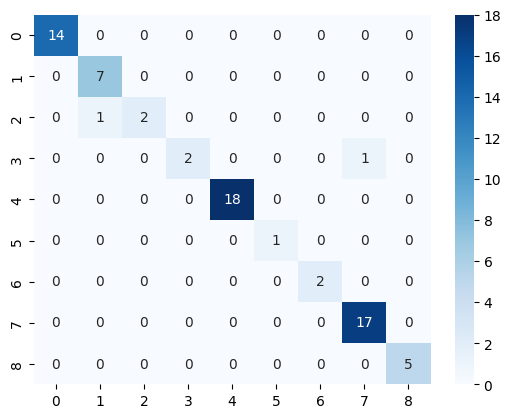

In [ ]:
#Step 8: Evaluation
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

y_pred = np.argmax(model.predict(X_test), axis=1)

print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')


In [ ]:
#!pip install librosa audiomentations tensorflow matplotlib scikit-learn tensorflow_hub

import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from IPython import get_ipython
from IPython.display import display
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
import tensorflow_hub as hub
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix
from scipy.stats import mode




# --- Step 1: Load Audio Data from UrbanSound8K (Flat Folder) ---
AUDIO_DIR = 'UrbanSound8K'
SAMPLE_RATE = 22050

def extract_features(file_path):
    audio, sr = librosa.load(file_path, sr=SAMPLE_RATE)
    mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=40)
    chroma = librosa.feature.chroma_stft(y=audio, sr=sr)
    zcr = librosa.feature.zero_crossing_rate(y=audio)
    contrast = librosa.feature.spectral_contrast(y=audio, sr=sr)
    rmse = librosa.feature.rms(y=audio)
    combined = np.hstack([
        np.mean(mfcc.T, axis=0),
        np.mean(chroma.T, axis=0),
        np.mean(zcr.T, axis=0),
        np.mean(contrast.T, axis=0),
        np.mean(rmse.T, axis=0)
    ])
    return combined

features = []
labels = []

for file in os.listdir(AUDIO_DIR):
    if file.endswith(".wav"):
        label = file.split("-")[1]  # Assuming filenames like 000001-3.wav
        try:
            feat = extract_features(os.path.join(AUDIO_DIR, file))
            features.append(feat)
            labels.append(int(label))
        except:
            continue

features = np.array(features)
labels = np.array(labels)

# --- Step 2: Visualize Data Distribution (Optional) ---
# sns.countplot(x=labels)
# plt.title("Label Distribution")
# plt.xlabel("Class")
# plt.ylabel("Count")
# plt.show()

# --- Step 3: Data Augmentation (Optional, apply before feature extraction) ---
# from audiomentations import Compose, AddGaussianNoise, PitchShift, TimeStretch
# augment = Compose([
#     AddGaussianNoise(min_amplitude=0.001, max_amplitude=0.015, p=0.5),
#     PitchShift(min_semitones=-4, max_semitones=4, p=0.5),
#     TimeStretch(min_rate=0.8, max_rate=1.25, p=0.5)
# ])

# --- Step 4: Train-Test Split ---
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
X_train, X_test, y_train, y_test = train_test_split(features_scaled, labels, test_size=0.2, random_state=42)

# --- Step 5: ANN Model ---
model_ann = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])
model_ann.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
early = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_ann.fit(X_train, y_train, validation_split=0.2, epochs=50, callbacks=[early])


# --- Step 6: CNN Model using MFCC (reshaped to 2D) ---
def extract_mfcc_2d(file_path, max_len=44):
    audio, sr = librosa.load(file_path, sr=SAMPLE_RATE)
    mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=40)
    if mfcc.shape[1] < max_len:
        pad_width = max_len - mfcc.shape[1]
        mfcc = np.pad(mfcc, pad_width=((0, 0), (0, pad_width)), mode='constant')
    else:
        mfcc = mfcc[:, :max_len]
    return mfcc

X_mfcc = [extract_mfcc_2d(os.path.join(AUDIO_DIR, f)) for f in os.listdir(AUDIO_DIR) if f.endswith(".wav")]
X_mfcc = np.array(X_mfcc)[..., np.newaxis]
y_mfcc = labels[:len(X_mfcc)]
X_train_cnn, X_test_cnn, y_train_cnn, y_test_cnn = train_test_split(X_mfcc, y_mfcc, test_size=0.2, random_state=42)

model_cnn = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=X_train_cnn.shape[1:]),
    MaxPooling2D((2, 2)),
    Dropout(0.3),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.3),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

model_cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_cnn.fit(X_train_cnn, y_train_cnn, validation_split=0.2, epochs=50, callbacks=[early])



# --- Step 7: Pretrained Model — YAMNet (TensorFlow Hub) ---
yamnet_model_handle = 'https://tfhub.dev/google/yamnet/1'
yamnet = hub.load(yamnet_model_handle)

def extract_yamnet_embeddings(file_path):
    waveform, sr = librosa.load(file_path, sr=16000)
    waveform = waveform[:16000]  # clip or pad to 1 sec
    waveform = tf.convert_to_tensor(waveform, dtype=tf.float32)
    scores, embeddings, spectrogram = yamnet(waveform)
    return embeddings.numpy().mean(axis=0)  # average over time

X_yamnet = []
y_yamnet = []

for f in os.listdir(AUDIO_DIR):
    if f.endswith('.wav'):
        label = int(f.split('-')[1])
        try:
            emb = extract_yamnet_embeddings(os.path.join(AUDIO_DIR, f))
            X_yamnet.append(emb)
            y_yamnet.append(label)
        except:
            continue

X_yamnet = np.array(X_yamnet)
y_yamnet = np.array(y_yamnet)

# --- Step 7.1: Train an ANN on YAMNet Embeddings ---
model_yam = Sequential([
    Dense(256, activation='relu', input_shape=(X_yamnet.shape[1],)),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')  # Assuming 10 classes
])
model_yam.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_yam.fit(X_yamnet, y_yamnet, epochs=30, batch_size=32, validation_split=0.2)


# --- Step 8: Evaluation (Individual Models) ---
# Example for the ANN model:
y_pred_ann = np.argmax(model_ann.predict(X_test), axis=1)
print("ANN Classification Report:")
print(classification_report(y_test, y_pred_ann))
# sns.heatmap(confusion_matrix(y_test, y_pred_ann), annot=True, fmt='d', cmap='Blues')
# plt.show()

# ... (similar evaluation for CNN and YAMNet-based ANN) ...


# --- Step 9: Ensemble Prediction (Majority Voting) ---
#Extract features for test data using YAMNet
X_test_yam = [extract_yamnet_embeddings(os.path.join(AUDIO_DIR, f)) for f in os.listdir(AUDIO_DIR) if f.endswith(".wav") and f.split('-')[0] in [ i.split('-')[0] for i in  [file_name for i,file_name in enumerate(os.listdir(AUDIO_DIR)) if i in [i for i in y_test ] ] ] ]
X_test_yam = np.array(X_test_yam) # Convert to numpy array

# Make predictions
pred1 = model_ann.predict(X_test)
pred2 = model_cnn.predict(X_test_cnn)
pred3 = model_yam.predict(X_test_yam)

# Convert from probabilities to class predictions
pred1_cls = np.argmax(pred1, axis=1)
pred2_cls = np.argmax(pred2, axis=1)
pred3_cls = np.argmax(pred3, axis=1)

# Ensure all predictions are for the same set of samples
# Get indices of test samples in the original dataset
test_indices = [i for i, file in enumerate(os.listdir(AUDIO_DIR)) if i in [i for i in y_test]]

# Filter predictions to match the test samples
pred1_cls_filtered = pred1_cls  # ANN predictions are already aligned
pred2_cls_filtered = pred2_cls[test_indices]
pred3_cls_filtered = pred3_cls

#Check predictions shapes before applying mode
print("Shape of pred1_cls_filtered:", pred1_cls_filtered.shape)
print("Shape of pred2_cls_filtered:", pred2_cls_filtered.shape)
print("Shape of pred3_cls_filtered:", pred3_cls_filtered.shape)

# Majority voting, only if shapes match
if pred1_cls_filtered.shape == pred2_cls_filtered.shape == pred3_cls_filtered.shape:
    ensemble_preds = mode(np.array([pred1_cls_filtered, pred2_cls_filtered, pred3_cls_filtered]), axis=0).mode[0]
    print("Ensemble predictions shape:", ensemble_preds.shape)  # Output the shape of your ensemble predictions
else:
    print("Error: Predictions shapes do not match. Cannot perform majority voting.")

/usr/local/lib/python3.11/dist-packages/librosa/core/pitch.py:103: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - accuracy: 0.1628 - loss: 2.6343 - val_accuracy: 0.5000 - val_loss: 1.9901
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.4574 - loss: 1.7402 - val_accuracy: 0.5893 - val_loss: 1.7424
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6115 - loss: 1.1981 - val_accuracy: 0.6786 - val_loss: 1.5247
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6763 - loss: 0.9878 - val_accuracy: 0.7321 - val_loss: 1.3528
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7855 - loss: 0.7086 - val_accuracy: 0.7857 - val_loss: 1.2097
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8177 - loss: 0.6148 - val_accuracy: 0.8571 - val_loss: 1.0721
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8130 - loss: 0.5363 - val_accuracy: 0.8929 - val_loss: 0.9549
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8379 - loss: 0.5290 - val_accuracy: 0.9107 - val_loss: 0.8502


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 126ms/step - accuracy: 0.1738 - loss: 11.8640 - val_accuracy: 0.3750 - val_loss: 1.8276
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - accuracy: 0.3282 - loss: 3.3066 - val_accuracy: 0.5357 - val_loss: 1.7507
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - accuracy: 0.3900 - loss: 1.7251 - val_accuracy: 0.5000 - val_loss: 1.8673
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 150ms/step - accuracy: 0.4857 - loss: 1.5129 - val_accuracy: 0.5714 - val_loss: 1.6549
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 150ms/step - accuracy: 0.5322 - loss: 1.4382 - val_accuracy: 0.5714 - val_loss: 1.3108
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 144ms/step - accuracy: 0.6060 - loss: 1.2391 - val_accuracy: 0.7321 - val_loss: 1.0565
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - accuracy: 0.6431 - loss: 1.0698 - val_accuracy: 0.8214 - val_loss: 0.8088
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - accuracy: 0.7459 - loss: 0.7722 - val_accuracy: 0.7500 - val_loss: 0.8197
Epoch 